In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


In [4]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)


labels = true_w[0]*features[ : ,0] + true_w[1]*features[ : ,1] + true_b
noise = torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
labels += noise

In [5]:
features.size(), labels.size()

(torch.Size([1000, 2]), torch.Size([1000]))

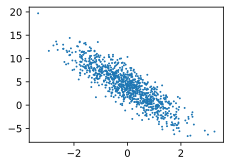

In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[ : ,1].numpy(), labels.numpy(), 1)

In [8]:
def data_iter(barch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i+barch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [10]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.7784, -1.9041],
        [ 1.5406,  0.5112],
        [-1.0224,  0.1761],
        [ 0.4062,  0.7185],
        [ 0.2881, -0.5435],
        [-0.2322, -1.2440],
        [ 1.1103, -0.3352],
        [ 1.1386,  0.3887],
        [-0.3298, -1.3499],
        [-0.4491, -1.7627]]) tensor([9.1064, 5.5426, 1.5509, 2.5523, 6.6132, 7.9630, 7.5547, 5.1345, 8.1228,
        9.3032])


In [19]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
b

tensor([0.])

In [20]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [21]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [28]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size()))** 2 / 2

In [26]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr*param.grad / batch_size

In [29]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()

    train_l = loss(net(features, w, b), labels)
    print('epoch %d , loss %f '%(epoch+1, train_l.mean().item()))

epoch 1 , loss 0.116976 
epoch 2 , loss 0.000387 
epoch 3 , loss 0.000048 


In [30]:
true_w, w

([2, -3.4], tensor([[ 1.9988],
         [-3.3993]], requires_grad=True))

In [31]:
true_b, b

(4.2, tensor([4.1993], requires_grad=True))